#### Name: Kaung Khant Lin
#### ID: 6540131

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols

In [2]:
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.2)

In [3]:
swedish_mortor_insurance = pd.read_csv('swedish_motor_insurance.csv')
display(swedish_mortor_insurance.head())

,n_claims,total_payment_sek
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [4]:
print(swedish_mortor_insurance.mean())

n_claims             22.904762
total_payment_sek    98.187302
dtype: float64


In [5]:
print(swedish_mortor_insurance['n_claims'].corr(swedish_mortor_insurance['total_payment_sek']))

0.9128782350234067


<Axes: xlabel='n_claims', ylabel='total_payment_sek'>

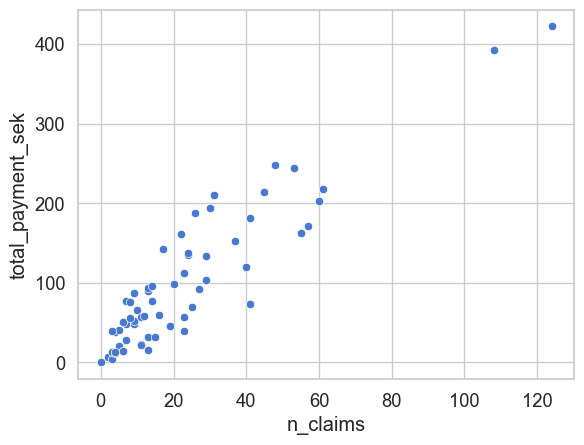

In [6]:
sns.scatterplot(x="n_claims", y="total_payment_sek", data=swedish_mortor_insurance)

<Axes: xlabel='n_claims', ylabel='total_payment_sek'>

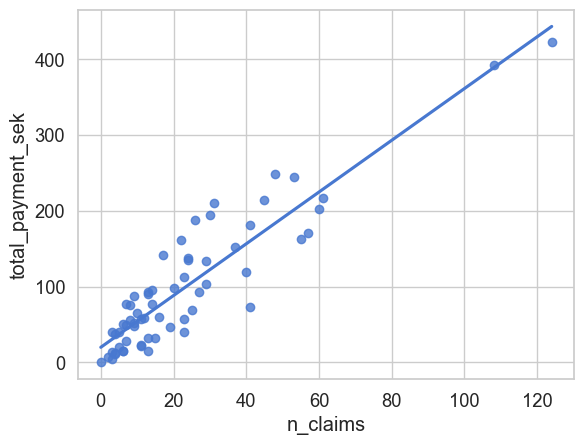

In [7]:
sns.regplot(x="n_claims", y="total_payment_sek", data=swedish_mortor_insurance, ci=None)

In [8]:
taiwan_real_estate = pd.read_csv('taiwan_real_estate2.csv')
display(taiwan_real_estate.head())

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


In [9]:
taiwan_real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   dist_to_mrt_m    414 non-null    float64
 1   n_convenience    414 non-null    int64  
 2   house_age_years  414 non-null    object 
 3   price_twd_msq    414 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 13.1+ KB


<Axes: xlabel='n_convenience', ylabel='price_twd_msq'>

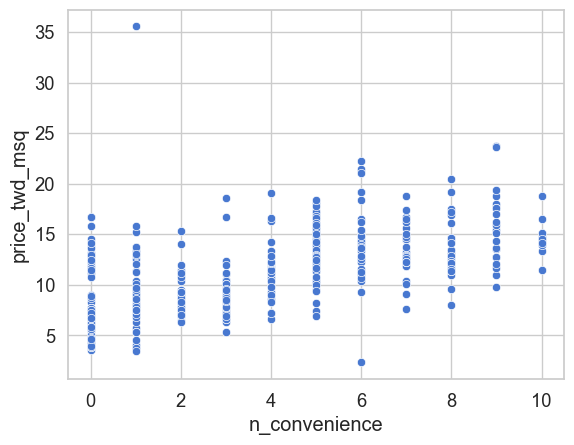

In [10]:
sns.scatterplot(x="n_convenience", y="price_twd_msq", data=taiwan_real_estate)

<Axes: xlabel='n_convenience', ylabel='price_twd_msq'>

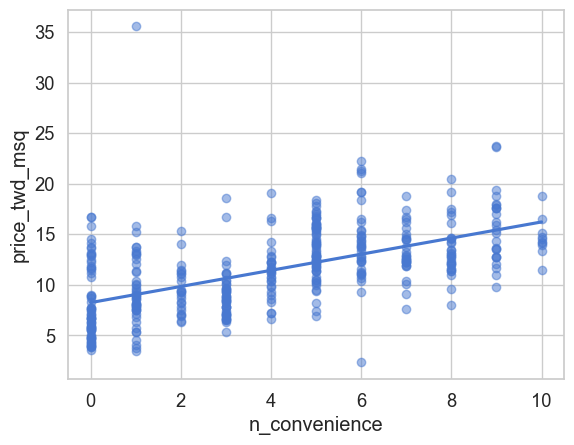

In [11]:
sns.regplot(x="n_convenience", y="price_twd_msq", data=taiwan_real_estate, ci=None, scatter_kws={"alpha":0.5})
# scatter_kws={"alpha":0.5} is used to make the scatter plot points 50% transparent

In [12]:
mdl_payment_vs_claims = ols('total_payment_sek ~ n_claims', data=swedish_mortor_insurance).fit()
"""
This script performs a linear regression analysis using the Ordinary Least Squares (OLS) method from the statsmodels library.

ols = a type of linear least squares method for choosing the unknown parameters in a linear regression model.

The script does the following:
1. Fits a linear regression model to predict 'total_payment_sek' based on 'n_claims' from the 'swedish_mortor_insurance' dataset.
2. Prints the parameters of the fitted model.

Variables:
    mdl_payment_vs_claims (RegressionResultsWrapper): The fitted OLS regression model.
    swedish_mortor_insurance (DataFrame): The dataset containing the variables 'total_payment_sek' and 'n_claims'.

Functions:
    ols: Function from statsmodels.formula.api to perform OLS regression.
    fit: Method to fit the OLS model to the data.
    print: Function to output the parameters of the fitted model.
"""
print(mdl_payment_vs_claims.params)

Intercept    19.994486
n_claims      3.413824
dtype: float64


In [13]:
print(mdl_payment_vs_claims.summary())

                            OLS Regression Results                            
Dep. Variable:      total_payment_sek   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     305.0
Date:                Sat, 01 Feb 2025   Prob (F-statistic):           2.05e-25
Time:                        15:55:45   Log-Likelihood:                -314.04
No. Observations:                  63   AIC:                             632.1
Df Residuals:                      61   BIC:                             636.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.9945      6.368      3.140      0.0

In [14]:
# Crete the model object using taiwan_real_estate dataset
mdl_price_vs_conv = ols('price_twd_msq ~ n_convenience', data=taiwan_real_estate)

#Fit the model
mdl_price_vs_conv = mdl_price_vs_conv.fit()

print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


### Question
The model had an Intercept coefficient of 8.2242. What does this mean?

a) On average, houses had a price of 8.2242 TWD per sqr.m.  
b) On average, a house with zero convenience stores nearby had a price of 8.2242 TWD per sqr.m.  
c) The minimum house price was 8.2242 TWD per sqr.m.  
d) The minimum house price with zero convenience stores nearby was 8.2242 TWD per sqr.m.  
e) The intercept tells you nothing about house prices  

#### Answer is `b`.

### Question
The model had an n_convenience coefficient of 0.7981. What does this mean?

a) If you increase the number of nearby convenience stores by one, then the expected increase in house price is 0.7981 TWD per sqr.m.  
b) If you increase the house price by 0.7981 TWD per sqr.m., then the expected increase in the number of nearby convenience stores is one.  
c) If you increase the number of nearby convenience stores by 0.7981, then the expected increase in house price is one TWD per sqr.m.  
d) If you increase the house price by one TWD per sqr.m., then the expected increase in the number of nearby convenience stores is 0.7981  
e) The n_convenience coefficient tells you nothing about house prices  

#### Answer is `a`.

In [15]:
fish = pd.read_csv('fish.csv')
display(fish.head())

,species,mass_g,length_cm
0,Bream,242.0,23.2
1,Bream,290.0,24.0
2,Bream,340.0,23.9
3,Bream,363.0,26.3
4,Bream,430.0,26.5


In [16]:
display(fish.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    128 non-null    object 
 1   mass_g     128 non-null    float64
 2   length_cm  128 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


None

In [17]:
fish.columns

Index(['species', 'mass_g', 'length_cm'], dtype='object')

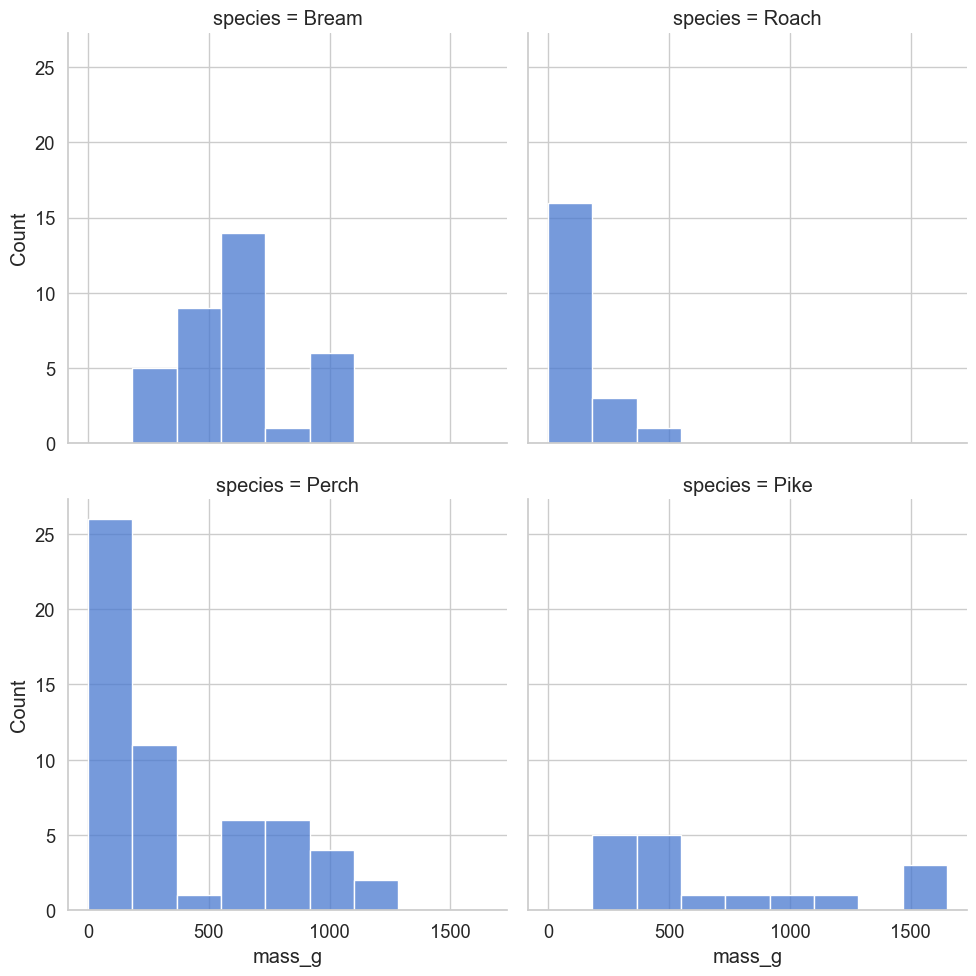

In [18]:
sns.displot(data=fish, x="mass_g", col="species", col_wrap=2, bins=9)
plt.show()

In [19]:
summary_stats = fish.groupby('species')['mass_g'].agg(['mean', 'std', 'count'])
display(summary_stats)

,mean,std,count
species,,,
Bream,617.828571,209.205709,35
Perch,382.239286,347.617717,56
Pike,718.705882,494.140765,17
Roach,152.050000,88.828916,20


In [20]:
mdl_mass_vs_species = ols('mass_g ~ species', data=fish).fit()
print(mdl_mass_vs_species.params)

Intercept           617.828571
species[T.Perch]   -235.589286
species[T.Pike]     100.877311
species[T.Roach]   -465.778571
dtype: float64


In [21]:
mdl_mass_vs_species_no_intercept = ols('mass_g ~ species + 0', data=fish).fit()
print(mdl_mass_vs_species_no_intercept.params)

species[Bream]    617.828571
species[Perch]    382.239286
species[Pike]     718.705882
species[Roach]    152.050000
dtype: float64


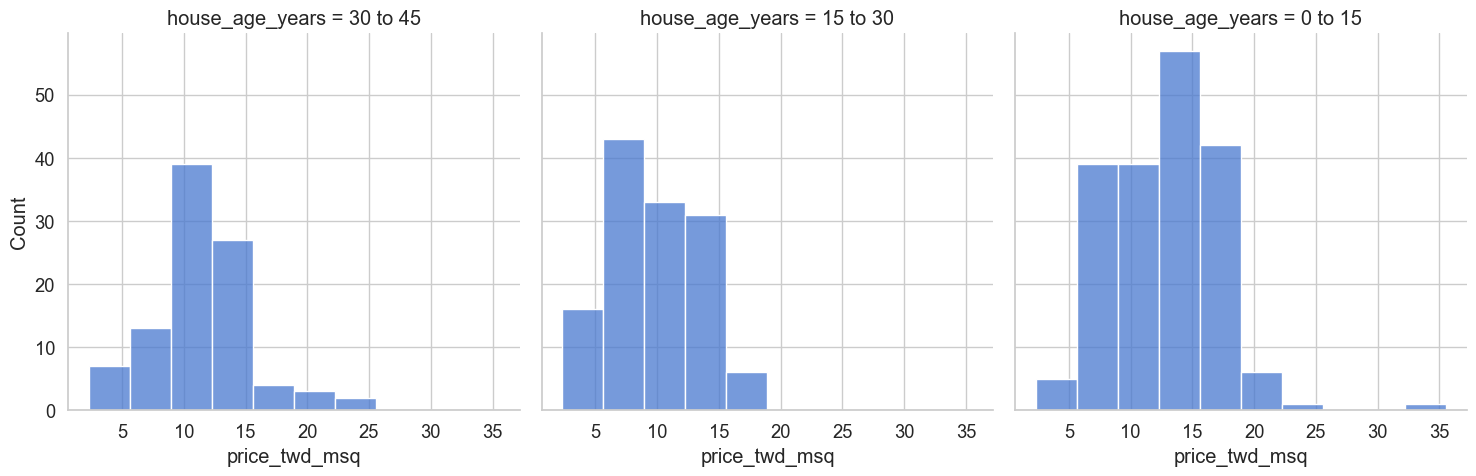

In [22]:
sns.displot(data=taiwan_real_estate, x="price_twd_msq", col="house_age_years", bins=10)
plt.show()

In [23]:
mean_price_by_age = taiwan_real_estate.groupby('house_age_years')['price_twd_msq'].mean()
print(mean_price_by_age)

house_age_years
0 to 15     12.637471
15 to 30     9.876743
30 to 45    11.393264
Name: price_twd_msq, dtype: float64


In [24]:
mdl_price_vs_age = ols('price_twd_msq ~ house_age_years', data=taiwan_real_estate).fit()

print(mdl_price_vs_age.params)

Intercept                      12.637471
house_age_years[T.15 to 30]    -2.760728
house_age_years[T.30 to 45]    -1.244207
dtype: float64


In [25]:
mdl_price_vs_age0 = ols('price_twd_msq ~ house_age_years + 0', data=taiwan_real_estate).fit()

print(mdl_price_vs_age0.params)

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64


In [26]:
bream = fish[fish['species'] == 'Bream']
display(bream.head())

,species,mass_g,length_cm
0,Bream,242.0,23.2
1,Bream,290.0,24.0
2,Bream,340.0,23.9
3,Bream,363.0,26.3
4,Bream,430.0,26.5


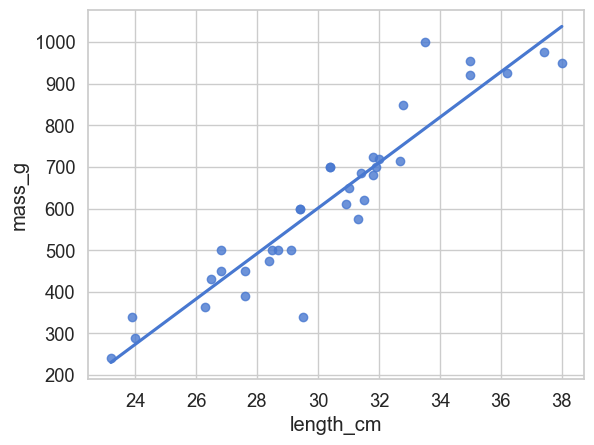

In [27]:
sns.regplot(x="length_cm", y="mass_g", data=bream, ci=None)
plt.show()

In [28]:
mdl_mass_vs_length = ols('mass_g ~ length_cm', data=bream).fit()
print(mdl_mass_vs_length.params)

Intercept   -1035.347565
length_cm      54.549981
dtype: float64


In [29]:
explanatory_data = pd.DataFrame({'length_cm': np.arange(20, 41)})
display(explanatory_data.head())

,length_cm
0,20
1,21
2,22
3,23
4,24


In [30]:
print(mdl_mass_vs_length.predict(explanatory_data))

0       55.652054
1      110.202035
2      164.752015
3      219.301996
4      273.851977
5      328.401958
6      382.951939
7      437.501920
8      492.051901
9      546.601882
10     601.151863
11     655.701844
12     710.251825
13     764.801806
14     819.351787
15     873.901768
16     928.451749
17     983.001730
18    1037.551710
19    1092.101691
20    1146.651672
dtype: float64


In [31]:
prediction_data = explanatory_data.assign(
    mass_g=mdl_mass_vs_length.predict(explanatory_data)
)

display(prediction_data)

,length_cm,mass_g
0,20,55.652054
1,21,110.202035
2,22,164.752015
3,23,219.301996
4,24,273.851977
5,25,328.401958
6,26,382.951939
7,27,437.501920
8,28,492.051901
9,29,546.601882


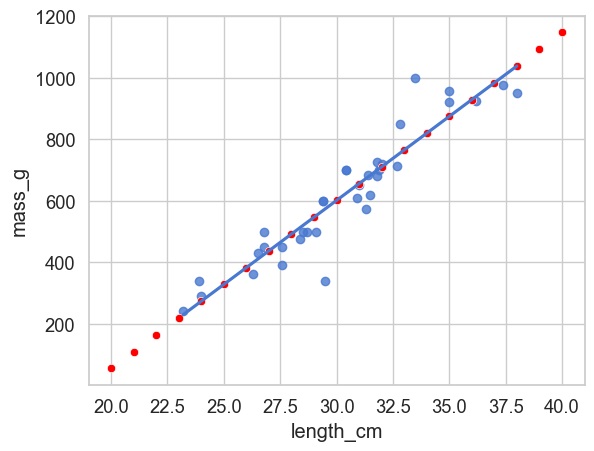

In [32]:
fig = plt.figure()
sns.regplot(x="length_cm", y="mass_g", data=bream, ci=None)
sns.scatterplot(x="length_cm", y="mass_g", data=prediction_data, color='red', markers='s')
plt.show()

In [33]:
# Extraploating - prediction outside the range of observed data
little_bream = pd.DataFrame({'length_cm': [10]})

pred_little_bream = little_bream.assign(
    mass_g=mdl_mass_vs_length.predict(little_bream)
)

display(pred_little_bream)

,length_cm,mass_g
0,10,-489.847756


In [34]:
explanatory_data = pd.DataFrame({'n_convenience': np.arange(0, 11)})
print(explanatory_data)

    n_convenience
0               0
1               1
2               2
3               3
4               4
5               5
6               6
7               7
8               8
9               9
10             10


In [35]:
price_twd_msq = mdl_price_vs_conv.predict(explanatory_data)
print(price_twd_msq)

0      8.224237
1      9.022317
2      9.820397
3     10.618477
4     11.416556
5     12.214636
6     13.012716
7     13.810795
8     14.608875
9     15.406955
10    16.205035
dtype: float64


In [36]:
prediction_data = explanatory_data.assign(
    mass_g=mdl_price_vs_conv.predict(explanatory_data)
)

display(prediction_data)

,n_convenience,mass_g
0,0,8.224237
1,1,9.022317
2,2,9.820397
3,3,10.618477
4,4,11.416556
5,5,12.214636
6,6,13.012716
7,7,13.810795
8,8,14.608875
9,9,15.406955


In [37]:
# Print the fitted values from the model
print(mdl_mass_vs_length.fittedvalues)

# Equivalently, we can use the predict method of the fitted model to get the fitted values
explanatory_data = bream["length_cm"]

# Print the predicted values using the explanatory data
print(mdl_mass_vs_length.predict(explanatory_data))

0      230.211993
1      273.851977
2      268.396979
3      399.316934
4      410.226930
5      426.591924
6      426.591924
7      470.231909
8      470.231909
9      519.326892
10     513.871893
11     530.236888
12     552.056880
13     573.876873
14     568.421874
15     568.421874
16     622.971855
17     622.971855
18     650.246846
19     655.701844
20     672.066838
21     677.521836
22     682.976834
23     699.341829
24     704.796827
25     699.341829
26     710.251825
27     748.436811
28     753.891810
29     792.076796
30     873.901768
31     873.901768
32     939.361745
33    1004.821722
34    1037.551710
dtype: float64
0      230.211993
1      273.851977
2      268.396979
3      399.316934
4      410.226930
5      426.591924
6      426.591924
7      470.231909
8      470.231909
9      519.326892
10     513.871893
11     530.236888
12     552.056880
13     573.876873
14     568.421874
15     568.421874
16     622.971855
17     622.971855
18     650.246846
19     655.70

In [38]:
# Print the residuals of the model
print(mdl_mass_vs_length.resid)

# Calculate the residuals using the fitted values and observed values
residuals = bream["mass_g"] - mdl_mass_vs_length.fittedvalues

# Print the residuals
print(residuals)

0      11.788007
1      16.148023
2      71.603021
3     -36.316934
4      19.773070
5      23.408076
6      73.408076
7     -80.231909
8     -20.231909
9     -19.326892
10    -38.871893
11    -30.236888
12    -52.056880
13   -233.876873
14     31.578126
15     31.578126
16     77.028145
17     77.028145
18    -40.246846
19     -5.701844
20    -97.066838
21      7.478164
22    -62.976834
23    -19.341829
24     -4.796827
25     25.658171
26      9.748175
27    -34.436811
28     96.108190
29    207.923204
30     46.098232
31     81.098232
32    -14.361745
33    -29.821722
34    -87.551710
dtype: float64
0      11.788007
1      16.148023
2      71.603021
3     -36.316934
4      19.773070
5      23.408076
6      73.408076
7     -80.231909
8     -20.231909
9     -19.326892
10    -38.871893
11    -30.236888
12    -52.056880
13   -233.876873
14     31.578126
15     31.578126
16     77.028145
17     77.028145
18    -40.246846
19     -5.701844
20    -97.066838
21      7.478164
22    -62.976834

In [39]:
coeffs = mdl_price_vs_conv.params
intercept = coeffs[0] # intercept = coeffs.iloc[0]
slope = coeffs[1] # slope = coeffs.iloc[1]

explanatory_data = pd.DataFrame({'n_convenience': np.arange(0, 11)})

# Calculate the predicted values using the model coefficients
price_twd_msq = intercept + slope * explanatory_data
print(price_twd_msq)


    n_convenience
0        8.224237
1        9.022317
2        9.820397
3       10.618477
4       11.416556
5       12.214636
6       13.012716
7       13.810795
8       14.608875
9       15.406955
10      16.205035


/var/folders/cj/pbw_t57n2_d6q03sfwx33bhh0000gn/T/ipykernel_60394/875823018.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = coeffs[0] # intercept = coeffs.iloc[0]
/var/folders/cj/pbw_t57n2_d6q03sfwx33bhh0000gn/T/ipykernel_60394/875823018.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = coeffs[1] # slope = coeffs.iloc[1]


In [40]:
# Use mdl_price_vs_conv to predict with explanatory data
price_twd_msq = mdl_price_vs_conv.predict(explanatory_data)

# Create a DataFrame with the explanatory data and predicted values
prediction_data = explanatory_data.assign(
    price_twd_msq=price_twd_msq
)

# Print the prediction data
print(prediction_data)

    n_convenience  price_twd_msq
0               0       8.224237
1               1       9.022317
2               2       9.820397
3               3      10.618477
4               4      11.416556
5               5      12.214636
6               6      13.012716
7               7      13.810795
8               8      14.608875
9               9      15.406955
10             10      16.205035


In [41]:
perch = fish[fish['species'] == 'Perch']
display(perch.head())

,species,mass_g,length_cm
55,Perch,5.9,7.5
56,Perch,32.0,12.5
57,Perch,40.0,13.8
58,Perch,51.5,15.0
59,Perch,70.0,15.7


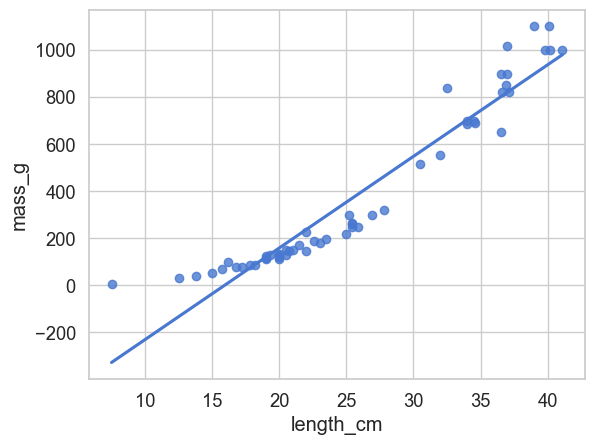

In [42]:
sns.regplot(x="length_cm", y="mass_g", data=perch, ci=None)
plt.show()

/var/folders/cj/pbw_t57n2_d6q03sfwx33bhh0000gn/T/ipykernel_60394/3707166865.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perch["length_cm_cubed"] = perch["length_cm"] ** 3


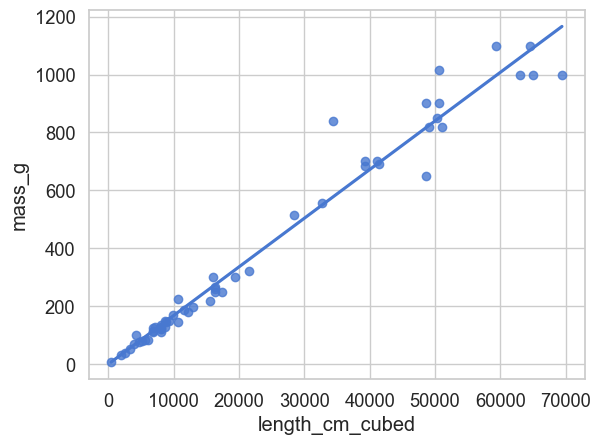

In [43]:
perch["length_cm_cubed"] = perch["length_cm"] ** 3

sns.regplot(x="length_cm_cubed", y="mass_g", data=perch, ci=None)
plt.show()

In [44]:
mdl_perch = ols('mass_g ~ length_cm_cubed', data=perch).fit()
print(mdl_perch.params)

Intercept         -0.117478
length_cm_cubed    0.016796
dtype: float64


In [45]:
explanatory_data = pd.DataFrame({'length_cm_cubed':np.arange(10,41,5)**3, 'length_cm':np.arange(10,41,5)})

prediction_data = explanatory_data.assign(mass_g = mdl_perch.predict(explanatory_data))
print(prediction_data)

   length_cm_cubed  length_cm       mass_g
0             1000         10    16.678135
1             3375         15    56.567717
2             8000         20   134.247429
3            15625         25   262.313982
4            27000         30   453.364084
5            42875         35   719.994447
6            64000         40  1074.801781


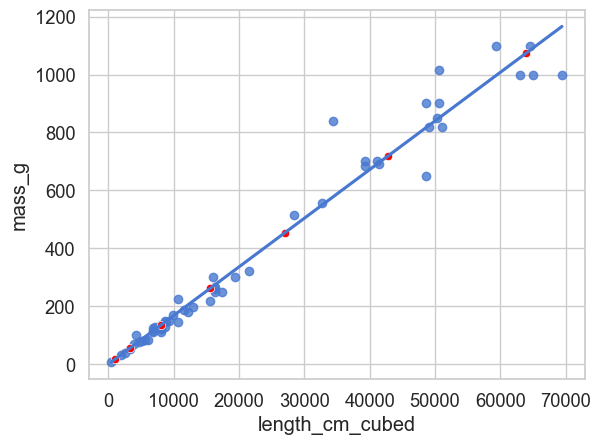

In [46]:
fig = plt.figure()
sns.regplot(x="length_cm_cubed", y="mass_g", data=perch, ci=None)
sns.scatterplot(x="length_cm_cubed", y="mass_g", data=prediction_data, color='red', markers='s')
plt.show()

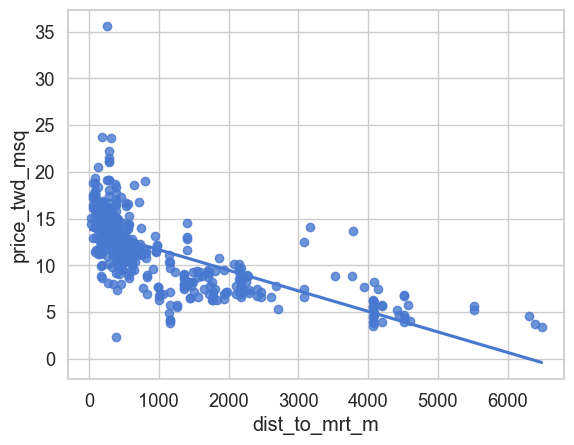

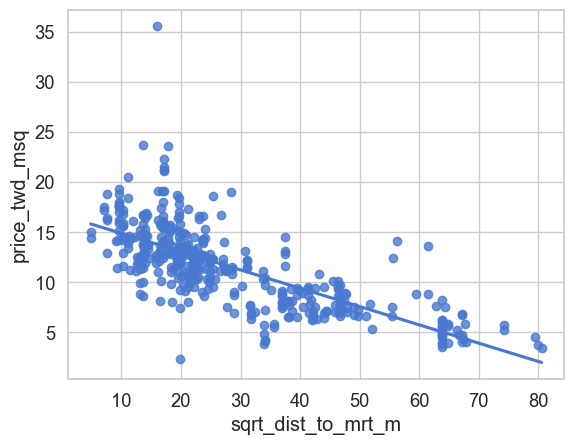

In [47]:
sns.regplot(x="dist_to_mrt_m", y="price_twd_msq", data=taiwan_real_estate, ci=None)
plt.show()

# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

plt.figure()

# Plot using the transformed variable
sns.regplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=taiwan_real_estate, ci=None)
plt.show()

In [48]:
# Run a linear regression of price_twd_msq vs. square root of dist_to_mrt_m using taiwan_real_estate
mdl_price_vs_dist = ols("price_twd_msq ~ sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

# Print the parameters
print(mdl_price_vs_dist.params)

Intercept             16.709799
sqrt_dist_to_mrt_m    -0.182843
dtype: float64


In [49]:
explanatory_data = pd.DataFrame({"sqrt_dist_to_mrt_m": np.sqrt(np.arange(0, 81, 10) ** 2),
                                 "dist_to_mrt_m": np.arange(0, 81, 10) ** 2})

# Create prediction_data by adding a column of predictions to explantory_data
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_dist.predict(explanatory_data)
)

# Print the result
print(prediction_data)

   sqrt_dist_to_mrt_m  dist_to_mrt_m  price_twd_msq
0                 0.0              0      16.709799
1                10.0            100      14.881370
2                20.0            400      13.052942
3                30.0            900      11.224513
4                40.0           1600       9.396085
5                50.0           2500       7.567656
6                60.0           3600       5.739227
7                70.0           4900       3.910799
8                80.0           6400       2.082370


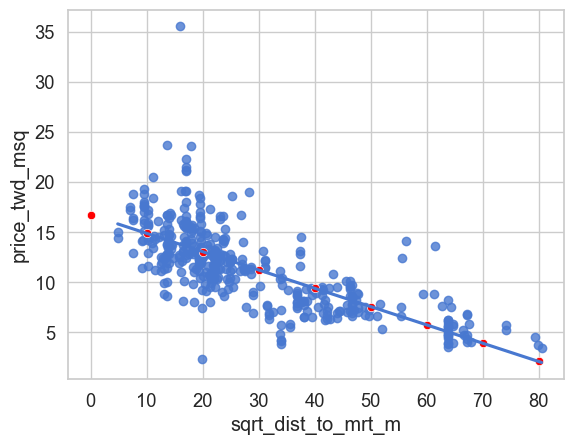

In [50]:
# Squared Root
fig = plt.figure()
sns.regplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=taiwan_real_estate, ci=None)

# Add a layer of your prediction points
sns.scatterplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=prediction_data, color="red")
plt.show()

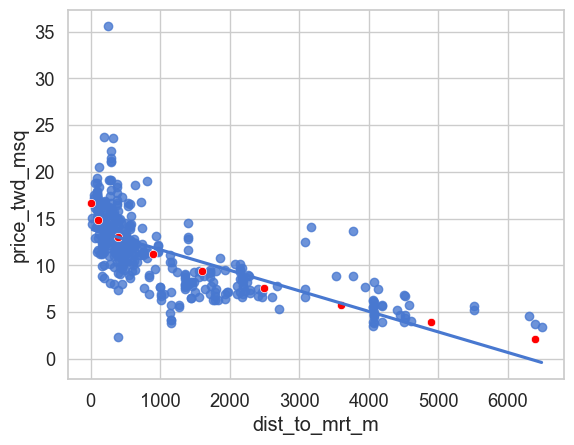

In [51]:
# Original
fig = plt.figure()
sns.regplot(x="dist_to_mrt_m", y="price_twd_msq", data=taiwan_real_estate, ci=None)

# Add a layer of your prediction points
sns.scatterplot(x="dist_to_mrt_m", y="price_twd_msq", data=prediction_data, color="red")
plt.show()

In [52]:
mdl_bream = ols('mass_g ~ length_cm', data=bream).fit()
print(mdl_bream.summary())

                            OLS Regression Results                            
Dep. Variable:                 mass_g   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     237.6
Date:                Sat, 01 Feb 2025   Prob (F-statistic):           1.22e-16
Time:                        15:55:46   Log-Likelihood:                -199.35
No. Observations:                  35   AIC:                             402.7
Df Residuals:                      33   BIC:                             405.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1035.3476    107.973     -9.589      0.0

In [53]:
print(mdl_bream.rsquared)

0.8780627095147174


In [54]:
# MSE = Mean Squared Error
print('mse: ', mdl_bream.mse_resid)

mse:  5498.555084973521


In [55]:
# RSE = Residual Standard Error

# MSE = RSE^2 , RSE = sqrt(MSE)
rse = np.sqrt(mdl_bream.mse_resid)
print('rse: ', rse)

rse:  74.15224261594197


#### Name: Kaung Khant Lin
#### ID: 6540131